## Aditya Jindal
## Batch M6
## Assignment 4
## Network with Improvement 3
## Architectural Basics 4
---
### Note: The rescpective code hopefully will be an improvement over our second attempted improved neural network.
### Continuing with the old network with
- 3x3 Conv2D Layers 
- Activation Layers
- Max Pooling2D Layers
- 1x1 Conv2D Layers
- SoftMax Layer
- BatchNormalization
- Inc. Batch
- Inc. Epochs

### As our final target is with 15k parameter of model and 99.4 validation accuracy. We have to make improvements in such a way that we will be able to achieve it.

### Improvements:

- Adding Dropouts

- Changing Learning rate

- Changing optimiser




# **Import Libraries and modules**

In [1]:
#Importing Keras to colab file
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Importing all the required libraries from the modules

import numpy as np
import math
from keras.models import Sequential
from keras.layers import Activation, Flatten, Input, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.callbacks import *

### Load pre-shuffled MNIST data into train and test sets

In [3]:
# Loading a database of handwritten digits
# we get X_train and X_test as array of the grey scale images of the digits with shape
# and y_train and y_test as array of the digits labels (i.e. 0-9) with sample number

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


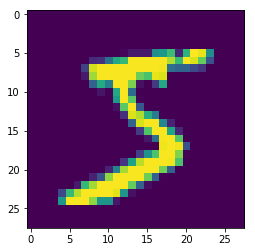

In [4]:
# We print the shape of our dataset array
# Also print the first handwritten digit image

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Reshaping the dataset to have one channel for each image present
# As images are on greyscale we will have 1 channel instead of 3
# For both test and train

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Set/Convert all the pixel values to float data type 
# Normalizing all pixel values by dividing with 255 so that every value lies btw 0-1

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# This shows first 10 train sample labels

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Converted the above 1-dimensional class label arrays to 10-dimensional class matrices
# As the test and train labels are not splitted into 10 distinct labels

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Looking at 10-dimensional class matrice
# Where the index [ranging from 0-9] of 1 tells the label

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
# Declaring a sequential model and its layers 
# Using Relu activation and 2D convolution with 3x3 kernel
# We flatten the last layer output to get 10 activations respective to 10 class labels we want to predict
# Using softmax to get a probability like value , so that we cant have a disticnt difference btw predictions
# Calling summary to see rendered model info

model = Sequential() 

model.add(Conv2D(10,(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.1))         #IMPV
# Input Channel Dim = (28x28x1)
# RF = 3

model.add(BatchNormalization()) 
model.add(Conv2D(16,(3, 3), activation='relu'))
model.add(Dropout(0.1))         #IMPV
# Input Channel Dim = (26x26x10)
# RF = 5

model.add(BatchNormalization()) 
model.add(Conv2D(24,(3, 3), activation='relu')) 
model.add(Dropout(0.1))         #IMPV
# Input Channel Dim = (24x24x16)
# RF = 7

model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
# Input Channel Dim = (22x22x24)
# RF = 14

model.add(Conv2D(10,(1, 1), activation='relu')) 
# Input Channel Dim = (11x11x24)
# RF = 14

model.add(BatchNormalization()) 
model.add(Conv2D(10,(3, 3), activation='relu')) 
model.add(Dropout(0.1))         #IMPV
# Input Channel Dim = (11x11x10)
# RF = 16

model.add(BatchNormalization())
model.add(Conv2D(16,(3, 3), activation='relu')) 
model.add(Dropout(0.1))         #IMPV
# Input Channel Dim = (9x9x10)
# RF = 18

model.add(BatchNormalization())
model.add(Conv2D(16,(3, 3), activation='relu')) 
model.add(Dropout(0.1))         #IMPV
# Input Channel Dim = (7x7x16)
# RF = 20

model.add(Conv2D(10,(5, 5)))
# Input Channel Dim = (5x5x16)
# RF = 24

model.add(Flatten())
# Input Channel Dim = (1x1x10)

model.add(Activation('softmax'))
# Input Channel Dim = (,10)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 24)        3480      
__________

In [0]:
# Compiling the model with particular loss function, optimiser

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

# Changing Learning rate based on monitored quantity
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.001, patience=3, verbose=1, 
             mode='max', min_delta=0.0001, min_lr=0.0001)

In [13]:
# Train the model with a batch size and epoch number on train data

model.fit(X_train, Y_train, batch_size=128, epochs = 30, verbose=1, validation_data=(X_test, Y_test), callbacks = [reduce_lr])


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 186us/step - loss: 0.1604 - acc: 0.9503 - val_loss: 0.0589 - val_acc: 0.9815
Epoch 2/30
60000/60000 [==============================] - 7s 118us/step - loss: 0.0693 - acc: 0.9785 - val_loss: 0.0497 - val_acc: 0.9850
Epoch 3/30
60000/60000 [==============================] - 7s 117us/step - loss: 0.0570 - acc: 0.9827 - val_loss: 0.0604 - val_acc: 0.9819
Epoch 4/30
60000/60000 [==============================] - 7s 117us/step - loss: 0.0524 - acc: 0.9837 - val_loss: 0.0430 - val_acc: 0.9871
Epoch 5/30
60000/60000 [==============================] - 7s 117us/step - loss: 0.0488 - acc: 0.9846 - val_loss: 0.0397 - val_acc: 0.9875
Epoch 6/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.0480 - acc: 0.9856 - val_loss: 0.0449 - val_acc: 0.9881
Epoch 7/30
60000/60000 [==============================] - 7s 125us/step -

In [0]:
# Evaluating the same model on test data to see how well it performs

score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.020810531074975734, 0.9945]


In [0]:
# Calculating the 10-dimensional class matrix for lables wrt. test data

y_pred = model.predict(X_test)

In [17]:
# Showing the Predicted labels and the Expected labels

print(y_pred[:9])
print(y_test[:9])

[[4.0513005e-12 3.3553276e-13 3.8275987e-11 4.7313237e-11 3.2239751e-17
  2.4112957e-13 2.6471848e-20 1.0000000e+00 2.9930745e-13 7.2991497e-09]
 [1.8360896e-10 3.5712869e-08 1.0000000e+00 5.9224151e-14 5.2483755e-12
  9.7843710e-19 1.6640275e-08 1.8234077e-13 3.8058714e-13 5.5439034e-17]
 [1.7727799e-13 1.0000000e+00 7.6026030e-10 4.9510817e-14 1.9409789e-08
  3.3154294e-08 1.6538340e-10 1.1790064e-09 3.7626066e-10 7.0730602e-11]
 [9.9999642e-01 1.8688085e-16 7.1106288e-10 2.4308226e-11 3.1674104e-11
  3.4361022e-10 3.6114664e-06 2.2303791e-12 9.9309458e-09 2.4313595e-08]
 [2.1923031e-17 4.4727399e-14 5.7252515e-14 1.2954184e-16 9.9999952e-01
  8.8806907e-15 4.8493518e-12 1.7471223e-14 5.7800438e-11 4.6320463e-07]
 [5.3263877e-13 1.0000000e+00 4.6751880e-10 5.0675241e-15 1.3462834e-08
  4.6699142e-09 4.9077083e-11 1.3372666e-09 4.9790755e-10 4.3722720e-11]
 [5.3006438e-20 1.4453053e-10 4.8769239e-10 5.7592328e-15 9.9999940e-01
  2.7531596e-13 9.4142100e-17 4.4689326e-08 5.2380494e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

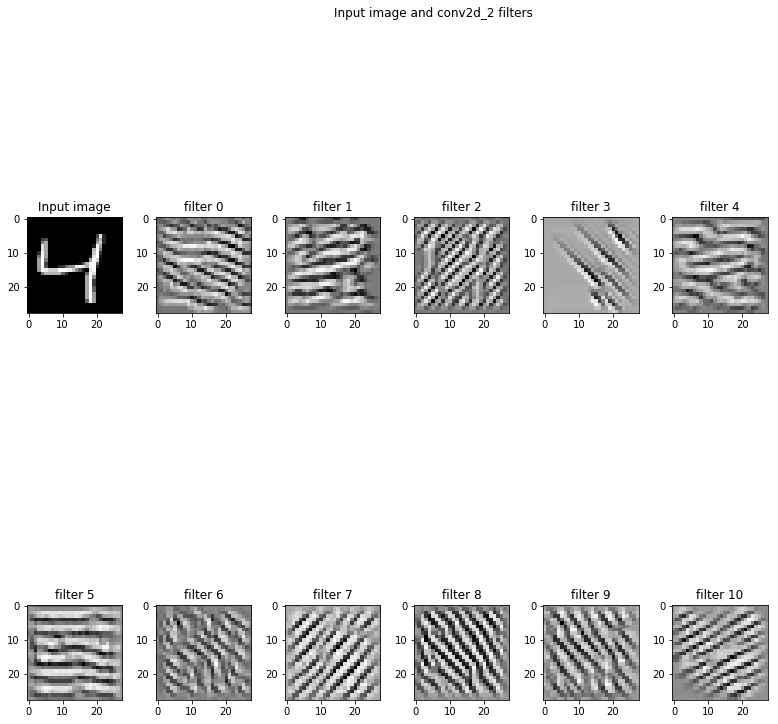

In [19]:
# Visualising kernel at a convolutional layer

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

## Observation:

To conclude this networks:
- With batch size of 128 in epochs 30, we have achieved 99.45 percent validation accuracy, which is also the maximum among all 30.
- Dropout helped us in reducing the overfitting gap.
- The Learning rate defined is not proper but still with lr = 0.0001 has helped us.  
- Using different techniques learned we have achieved our target.
- Looking at the difference between the training acc. and the validation acc. we can definitely say that the model is  not overfitting now.